In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.class_weights import calculate_class_weight
from functions.loading_data import load_dataset
from functions.model_running import get_run_number, run_model
from models.xception import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'xception_dealing_with_imbalance_4_class_weights_and_bias'

In [3]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

In [4]:
BATCH_SIZE = 64
dataset = load_dataset(HEIGHT, WIDTH, DATA_DIR, 'training', BATCH_SIZE)
class_weight = calculate_class_weight(dataset, .6)

Found 8015 files belonging to 7 classes.


In [5]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 5.1700 - categorical cross entropy: 1.3702 - mean squared error: 0.0792 - accuracy: 0.6635 - auc: 0.4994 - prc: 0.1430

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_1\assets


126/126 [==============================] - 71s 492ms/step - loss: 5.1700 - categorical cross entropy: 1.3702 - mean squared error: 0.0792 - accuracy: 0.6635 - auc: 0.4994 - prc: 0.1430 - val_loss: 1.1173 - val_categorical cross entropy: 1.1173 - val_mean squared error: 0.0739 - val_accuracy: 0.6705 - val_auc: 0.5354 - val_prc: 0.1563 - lr: 0.0010
Epoch 2/100
126/126 [==============================] - 48s 381ms/step - loss: 3.6682 - categorical cross entropy: 0.9844 - mean squared error: 0.0640 - accuracy: 0.6791 - auc: 0.7458 - prc: 0.2542 - val_loss: 2.2074 - val_categorical cross entropy: 2.2074 - val_mean squared error: 0.0801 - val_accuracy: 0.6600 - val_auc: 0.6984 - val_prc: 0.3014 - lr: 0.0010
Epoch 3/100
126/126 [==============================] - 48s 381ms/step - loss: 3.0586 - categorical cross entropy: 0.8354 - mean squared error: 0.0560 - accuracy: 0.7077 - auc: 0.8525 - prc: 0.3607 - val_loss: 1.6436 - val_categorical cross entropy: 1.6436 - val_mean squared error: 0.1007 -

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_4\assets


126/126 [==============================] - 61s 485ms/step - loss: 2.9937 - categorical cross entropy: 0.8201 - mean squared error: 0.0556 - accuracy: 0.7185 - auc: 0.8657 - prc: 0.3875 - val_loss: 0.9234 - val_categorical cross entropy: 0.9234 - val_mean squared error: 0.0579 - val_accuracy: 0.7015 - val_auc: 0.8426 - val_prc: 0.4257 - lr: 0.0010
Epoch 5/100
126/126 [==============================] - ETA: 0s - loss: 2.6505 - categorical cross entropy: 0.7318 - mean squared error: 0.0508 - accuracy: 0.7377 - auc: 0.8977 - prc: 0.4477

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_5\assets


126/126 [==============================] - 61s 482ms/step - loss: 2.6505 - categorical cross entropy: 0.7318 - mean squared error: 0.0508 - accuracy: 0.7377 - auc: 0.8977 - prc: 0.4477 - val_loss: 0.7753 - val_categorical cross entropy: 0.7753 - val_mean squared error: 0.0538 - val_accuracy: 0.7180 - val_auc: 0.9082 - val_prc: 0.5364 - lr: 0.0010
Epoch 6/100
126/126 [==============================] - ETA: 0s - loss: 2.4663 - categorical cross entropy: 0.6871 - mean squared error: 0.0480 - accuracy: 0.7521 - auc: 0.9121 - prc: 0.5070

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_6\assets


126/126 [==============================] - 61s 480ms/step - loss: 2.4663 - categorical cross entropy: 0.6871 - mean squared error: 0.0480 - accuracy: 0.7521 - auc: 0.9121 - prc: 0.5070 - val_loss: 0.6708 - val_categorical cross entropy: 0.6708 - val_mean squared error: 0.0472 - val_accuracy: 0.7620 - val_auc: 0.9145 - val_prc: 0.5537 - lr: 0.0010
Epoch 7/100
126/126 [==============================] - 48s 380ms/step - loss: 2.2924 - categorical cross entropy: 0.6424 - mean squared error: 0.0455 - accuracy: 0.7688 - auc: 0.9235 - prc: 0.5615 - val_loss: 0.6774 - val_categorical cross entropy: 0.6774 - val_mean squared error: 0.0477 - val_accuracy: 0.7570 - val_auc: 0.9056 - val_prc: 0.5575 - lr: 0.0010
Epoch 8/100
126/126 [==============================] - 48s 381ms/step - loss: 2.2009 - categorical cross entropy: 0.6187 - mean squared error: 0.0435 - accuracy: 0.7828 - auc: 0.9281 - prc: 0.6027 - val_loss: 0.6833 - val_categorical cross entropy: 0.6833 - val_mean squared error: 0.0470 -

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_9\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_9\assets


126/126 [==============================] - 61s 488ms/step - loss: 2.0511 - categorical cross entropy: 0.5822 - mean squared error: 0.0419 - accuracy: 0.7913 - auc: 0.9389 - prc: 0.6359 - val_loss: 0.5741 - val_categorical cross entropy: 0.5741 - val_mean squared error: 0.0403 - val_accuracy: 0.8065 - val_auc: 0.9361 - val_prc: 0.6803 - lr: 0.0010
Epoch 10/100
126/126 [==============================] - ETA: 0s - loss: 2.0214 - categorical cross entropy: 0.5745 - mean squared error: 0.0413 - accuracy: 0.7946 - auc: 0.9397 - prc: 0.6493

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_10\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_10\assets


126/126 [==============================] - 63s 497ms/step - loss: 2.0214 - categorical cross entropy: 0.5745 - mean squared error: 0.0413 - accuracy: 0.7946 - auc: 0.9397 - prc: 0.6493 - val_loss: 0.5708 - val_categorical cross entropy: 0.5708 - val_mean squared error: 0.0388 - val_accuracy: 0.8050 - val_auc: 0.9277 - val_prc: 0.6880 - lr: 0.0010
Epoch 11/100
126/126 [==============================] - 49s 383ms/step - loss: 1.9405 - categorical cross entropy: 0.5513 - mean squared error: 0.0399 - accuracy: 0.8019 - auc: 0.9455 - prc: 0.6737 - val_loss: 0.8513 - val_categorical cross entropy: 0.8513 - val_mean squared error: 0.0504 - val_accuracy: 0.7480 - val_auc: 0.8759 - val_prc: 0.5664 - lr: 0.0010
Epoch 12/100
126/126 [==============================] - 48s 384ms/step - loss: 2.0003 - categorical cross entropy: 0.5676 - mean squared error: 0.0409 - accuracy: 0.7974 - auc: 0.9413 - prc: 0.6746 - val_loss: 1.0347 - val_categorical cross entropy: 1.0347 - val_mean squared error: 0.0537

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_18\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_18\assets


126/126 [==============================] - 62s 493ms/step - loss: 1.9535 - categorical cross entropy: 0.5572 - mean squared error: 0.0397 - accuracy: 0.8057 - auc: 0.9447 - prc: 0.6948 - val_loss: 0.5509 - val_categorical cross entropy: 0.5509 - val_mean squared error: 0.0392 - val_accuracy: 0.8035 - val_auc: 0.9467 - val_prc: 0.7285 - lr: 0.0010
Epoch 19/100
126/126 [==============================] - 49s 389ms/step - loss: 1.6991 - categorical cross entropy: 0.4882 - mean squared error: 0.0355 - accuracy: 0.8241 - auc: 0.9567 - prc: 0.7487 - val_loss: 0.6876 - val_categorical cross entropy: 0.6876 - val_mean squared error: 0.0476 - val_accuracy: 0.7790 - val_auc: 0.9252 - val_prc: 0.6748 - lr: 0.0010
Epoch 20/100
126/126 [==============================] - 49s 391ms/step - loss: 1.5986 - categorical cross entropy: 0.4607 - mean squared error: 0.0340 - accuracy: 0.8302 - auc: 0.9624 - prc: 0.7694 - val_loss: 0.6431 - val_categorical cross entropy: 0.6431 - val_mean squared error: 0.0431

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_24\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_3_oversampling_and_bias_20_24\assets


126/126 [==============================] - 61s 487ms/step - loss: 1.3525 - categorical cross entropy: 0.3970 - mean squared error: 0.0297 - accuracy: 0.8578 - auc: 0.9721 - prc: 0.8328 - val_loss: 0.5399 - val_categorical cross entropy: 0.5399 - val_mean squared error: 0.0377 - val_accuracy: 0.8190 - val_auc: 0.9385 - val_prc: 0.7533 - lr: 0.0010
Epoch 25/100
126/126 [==============================] - 49s 384ms/step - loss: 1.3181 - categorical cross entropy: 0.3853 - mean squared error: 0.0287 - accuracy: 0.8595 - auc: 0.9734 - prc: 0.8337 - val_loss: 0.7092 - val_categorical cross entropy: 0.7092 - val_mean squared error: 0.0464 - val_accuracy: 0.7790 - val_auc: 0.9011 - val_prc: 0.6596 - lr: 0.0010
Epoch 26/100
126/126 [==============================] - 48s 384ms/step - loss: 1.3527 - categorical cross entropy: 0.3928 - mean squared error: 0.0295 - accuracy: 0.8545 - auc: 0.9715 - prc: 0.8240 - val_loss: 0.6848 - val_categorical cross entropy: 0.6848 - val_mean squared error: 0.0470

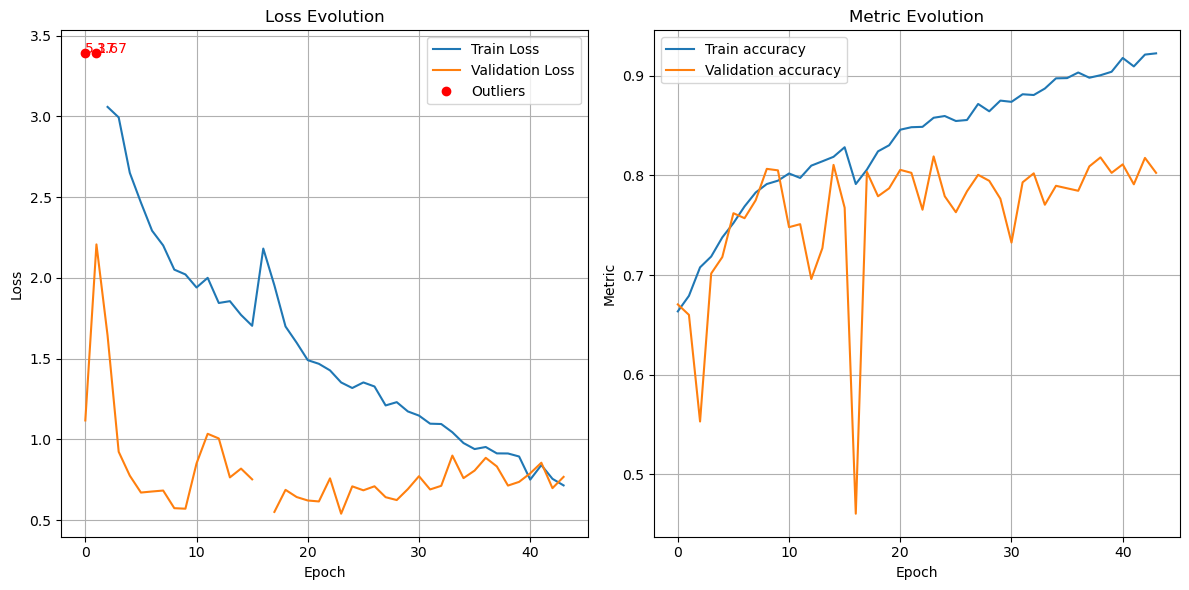

(<keras.engine.functional.Functional at 0x19eefd3ec40>,
 <keras.callbacks.History at 0x19eeced0df0>)

In [6]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_basic_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS,
            biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    class_weight=class_weight,
    stopping_patience=20)